In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [27]:
df = pd.DataFrame()

for a in [0.1, 0.5, 0.9]:
    for s in [0, 0.5, 1.0]:
        path = f"./raven/box-25-12-7-a{a:.1f}-s{s:.1f}/ImpulseResponses/*/*/Histograms/*_RT.hst"
        data = []
        times = []

        with open(glob.glob(path)[0]) as f:
            start = False
            for l in f:
                if not start and l[0] != '0':
                    continue
                else:
                    start = True
                    time = l.split(',')[0].split('=')[1]
                    times.append(time)
                    data.append(float(l.split(',')[2]))

        df.insert(0, f"a{a:.1f}-s{s:.1f}", data)
df.insert(0, "time", times)
df.set_index("time", inplace=True, drop=True)

In [28]:
def db(x):
    energy = x * 0.
    # Compute the whole integral
    total = np.trapz(x, axis=0)**2
    for i in range(x.shape[0]):
        energy.iloc[i] = (np.trapz(x[i:], axis=0)**2 / total)

    # in dB
    energy_db = 10 * np.log10(energy)
    
    return energy_db

(-100.0, 1.0)

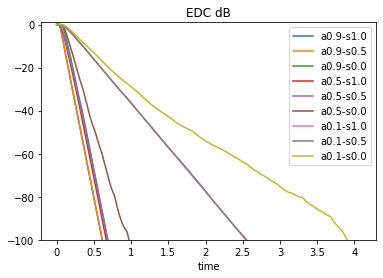

In [29]:
db(df.ewm(span = 10).mean()).plot()
plt.title('EDC dB')
plt.ylim(-100, 1.0)

In [30]:
df.to_pickle('./raven/data.pkl')
db(df.ewm(span = 10).mean()).to_pickle('./raven/data_db.pkl')